# Seaborn

### Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them

In [ ]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [ ]:
# Load an example dataset
tips = sns.load_dataset("tips")
tips
# just pandas dataframes...

In [ ]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)


#This plot shows the relationship between five variables in the tips dataset using a single call to the seaborn function relplot().
# Notice how we provided only the names of the variables and their roles in the plot.
# Unlike when using matplotlib directly, it wasn’t necessary to specify attributes of the plot elements in terms of the color values or marker codes.
# Behind the scenes, seaborn handled the translation from values in the dataframe to arguments that matplotlib understands.
# This declarative approach lets you stay focused on the questions that you want to answer, rather than on the details of how to control matplotlib.

# arg:
  # x --> x axis
  # y --> y axis
  # col --> 2 plots (subsets)
  # hue --> Color
  # style --> Shape
  # size  --> size of each mark



In [ ]:
# Create a visualization
# row arg
sns.relplot(
    data=tips,
    x="total_bill", y="tip", row="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
# There is no universally best way to visualize data. Different questions are best answered by different plots.
# Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

# The function relplot() is named that way because it is designed to visualize many different statistical relationships.
# While scatter plots are often effective, relationships where one variable represents a measure of time are better represented by a line.
# The relplot() function has a convenient kind parameter that lets you easily switch to this alternate representation
# kind="scatter" is the default style of plot

<br>
<br>
<hr class="dotted">
<br>
<br>

In [ ]:
dots = sns.load_dataset("dots")
dots

In [ ]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice"
)

# arg:
  # kind --> chart type


In [ ]:
sns.relplot(
    data=dots, kind="line",
    x="time", y="firing_rate", col="align",
    hue="choice", size="coherence", style="choice",
    facet_kws=dict(sharex=False)
)
# arg:
  # facet_kws --> An object managing one or more subplots that correspond to conditional data subsets with convenient methods for batch-setting of axes attribute

In [ ]:
# Notice how the size and style parameters are used in both the scatter and line plots,
# but they affect the two visualizations differently
# changing the marker area and symbol in the scatter plot vs the line width and dashing in the line plot.
# We did not need to keep those details in mind, letting us focus on the overall structure of the plot and the information we want it to convey.

<br>
<br>
<hr class="dotted">
<br>
<br>

In [38]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


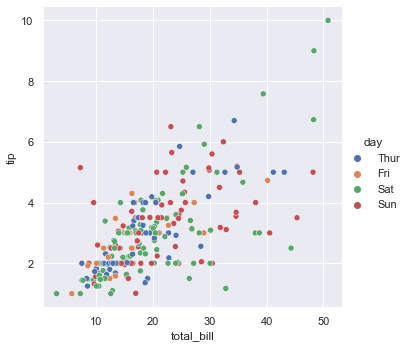

In [29]:
# Assigning x and y and any semantic mapping variables will draw a single plot:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day")

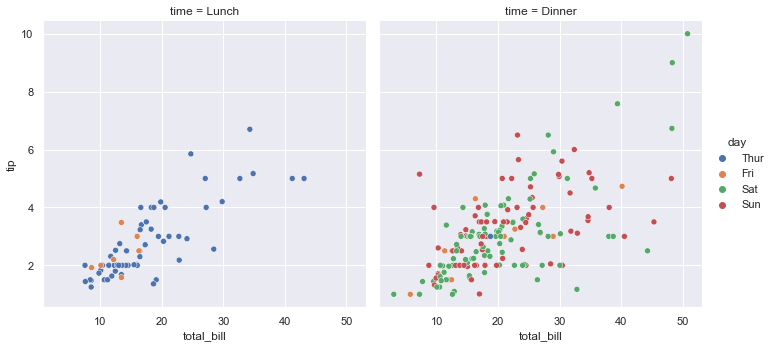

In [30]:
# Assigning a col variable creates a faceted figure with multiple subplots arranged across the columns of the grid
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")

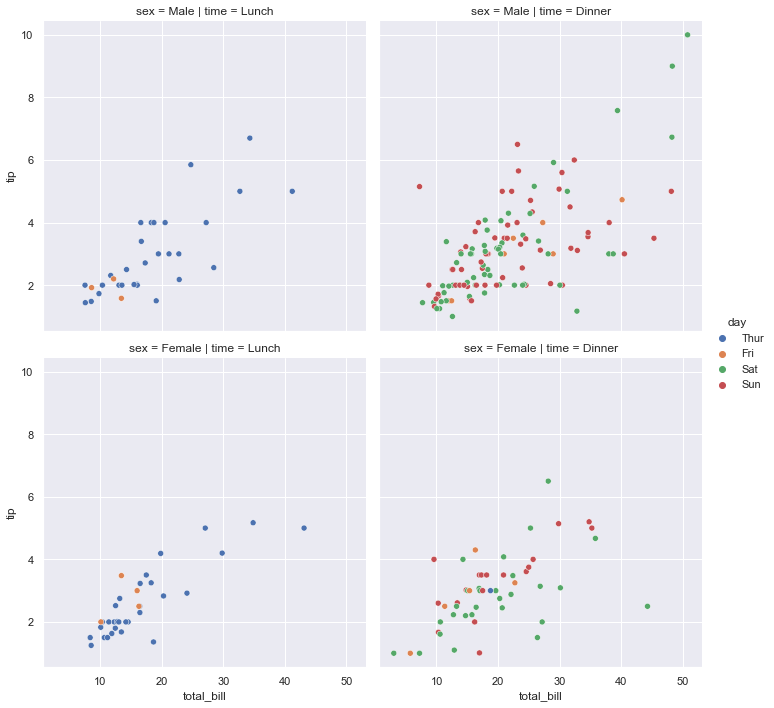

In [31]:
# Different variables can be assigned to facet on both the columns and rows
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time", row="sex")

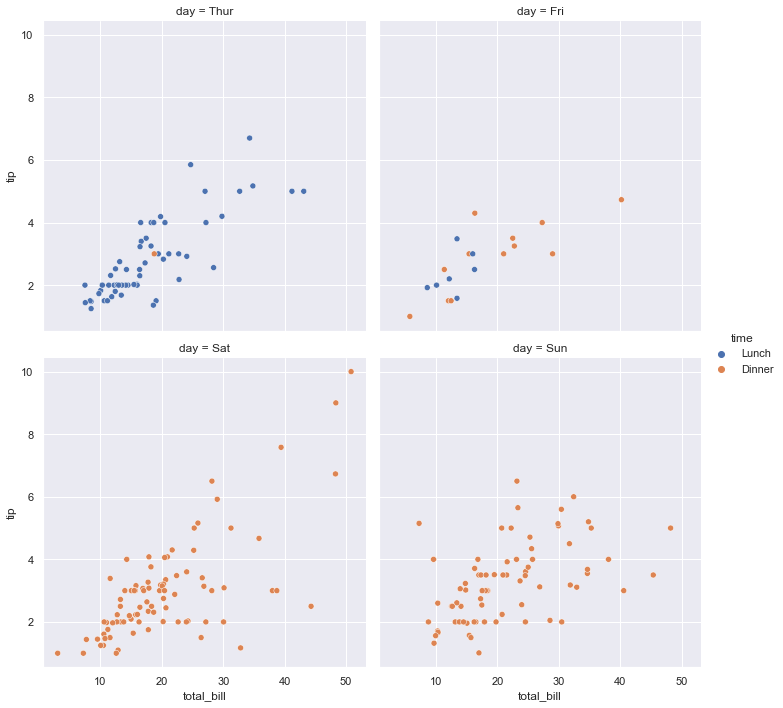

In [35]:
# When the variable assigned to col has many levels, it can be “wrapped” across multiple rows
sns.relplot(data=tips, x="total_bill", y="tip", hue="time", col="day",col_wrap=2)
# arg:
  # col_wrapint --> “Wrap” the column variable at this width, so that the column facets span multiple rows. Incompatible with a row facet

<br>
<br>
<hr class="dotted">
<br>
<br>

In [39]:
# Often, we are interested in the average value of one variable as a function of other variables.
# Many seaborn functions will automatically perform the statistical estimation that is necessary to answer these questions
fmri = sns.load_dataset("fmri")
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


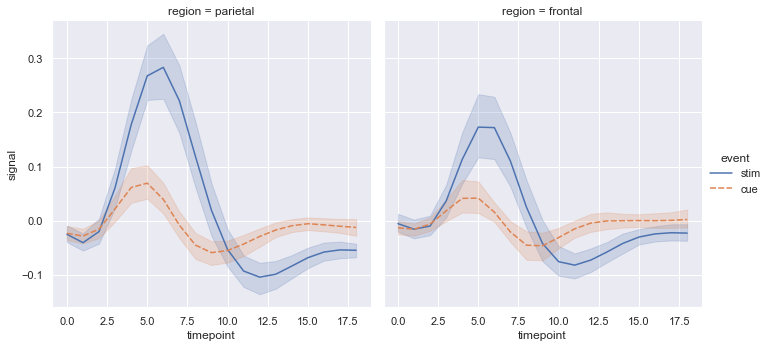

In [40]:
sns.relplot(
    data=fmri, kind="line",
    x="timepoint", y="signal", col="region",
    hue="event", style="event",
)

In [ ]:
# When statistical values are estimated, seaborn will use bootstrapping to compute confidence intervals and draw error bars representing the uncertainty of the estimate.

<br>
<br>
<hr class="dotted">
<br>
<br>

In [41]:
# Statistical analyses require knowledge about the distribution of variables in your dataset.
# The seaborn function displot() supports several approaches to visualizing distributions.
# These include classic techniques like histograms

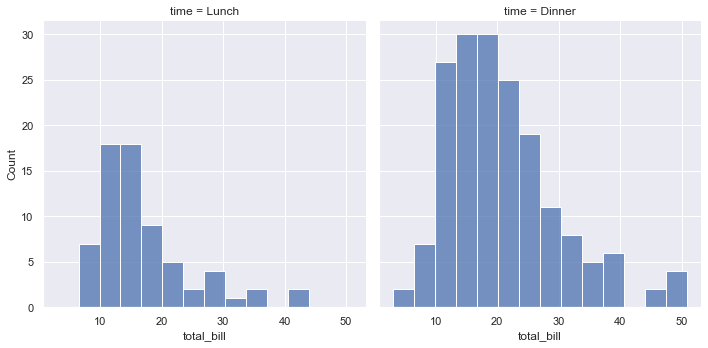

In [42]:
sns.displot(data=tips, x="total_bill", col="time")

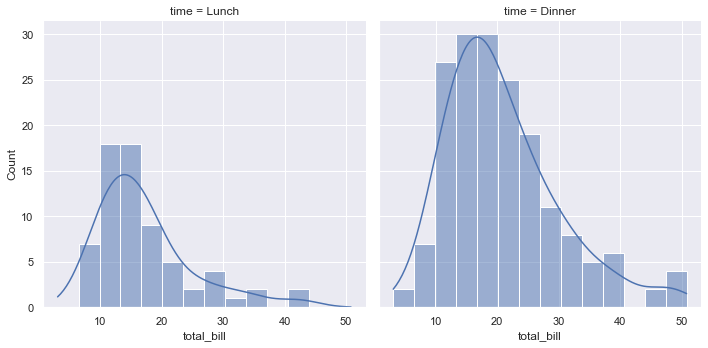

In [43]:
sns.displot(data=tips, x="total_bill", col="time", kde=True)

In [44]:
# arg:
  # kde=True  --> kde curve
  # A "kernel density estimate" (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.
  # KDE represents the data using a continuous probability density curve in one or more dimensions.

<br>
<br>
<hr class="dotted">
<br>
<br>

In [45]:
# Several specialized plot types in seaborn are oriented towards visualizing categorical data. They can be accessed through catplot().
# These plots offer different levels of granularity.
# At the finest level, you may wish to see every observation by drawing a “swarm” plot,
# a scatter plot that adjusts the positions of the points along the categorical axis so that they don’t overlap

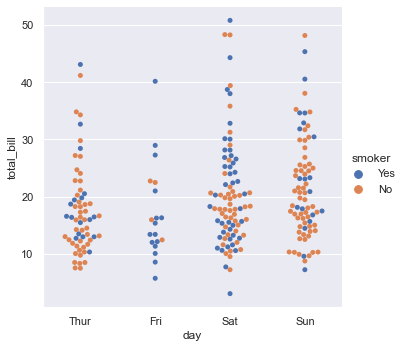

In [46]:
sns.catplot(data=tips, kind="swarm", x="day", y="total_bill", hue="smoker")

In [47]:
# Alternately, you could use kernel density estimation to represent the underlying distribution that the points are sampled from

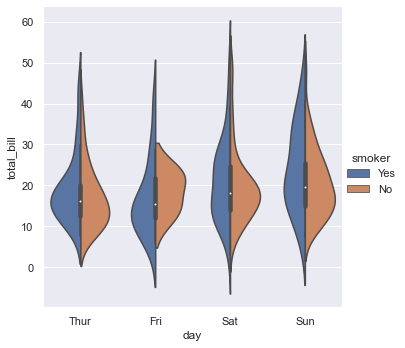

In [48]:
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker", split=True)
# arg:
  # split = true  --> Shows "smokers" together

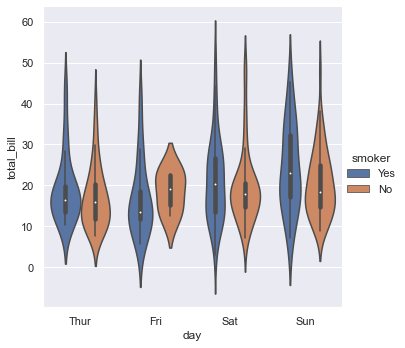

In [49]:
# Without --> "split = true"
sns.catplot(data=tips, kind="violin", x="day", y="total_bill", hue="smoker")

<br>
<br>
<hr class="dotted">
<br>
<br>